In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [4]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [5]:
import os

In [6]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/braint/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/braint/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3274, 150, 150, 3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network inspired by VGG 16

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 28s 156ms/step - loss: 1.9062 - accuracy: 0.2980 - val_loss: 1.3592 - val_accuracy: 0.2847
Epoch 2/20
83/83 [==============================] - 8s 92ms/step - loss: 1.3046 - accuracy: 0.3685 - val_loss: 1.0907 - val_accuracy: 0.5322
Epoch 3/20
83/83 [==============================] - 8s 93ms/step - loss: 1.0575 - accuracy: 0.5477 - val_loss: 1.0102 - val_accuracy: 0.5458
Epoch 4/20
83/83 [==============================] - 8s 93ms/step - loss: 0.9076 - accuracy: 0.6077 - val_loss: 0.9734 - val_accuracy: 0.5458
Epoch 5/20
83/83 [==============================] - 8s 95ms/step - loss: 0.7799 - accuracy: 0.6714 - val_loss: 0.8337 - val_accuracy: 0.6102
Epoch 6/20
83/83 [==============================] - 8s 95ms/step - loss: 0.7118 - accuracy: 0.6884 - val_loss: 0.7777 - val_accuracy: 0.6475
Epoch 7/20
83/83 [==============================] - 8s 93ms/step - loss: 0.6379 - accuracy: 0.7329 - val_loss: 0.6749 - val_accuracy: 0.7119
Epoch 8/20


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


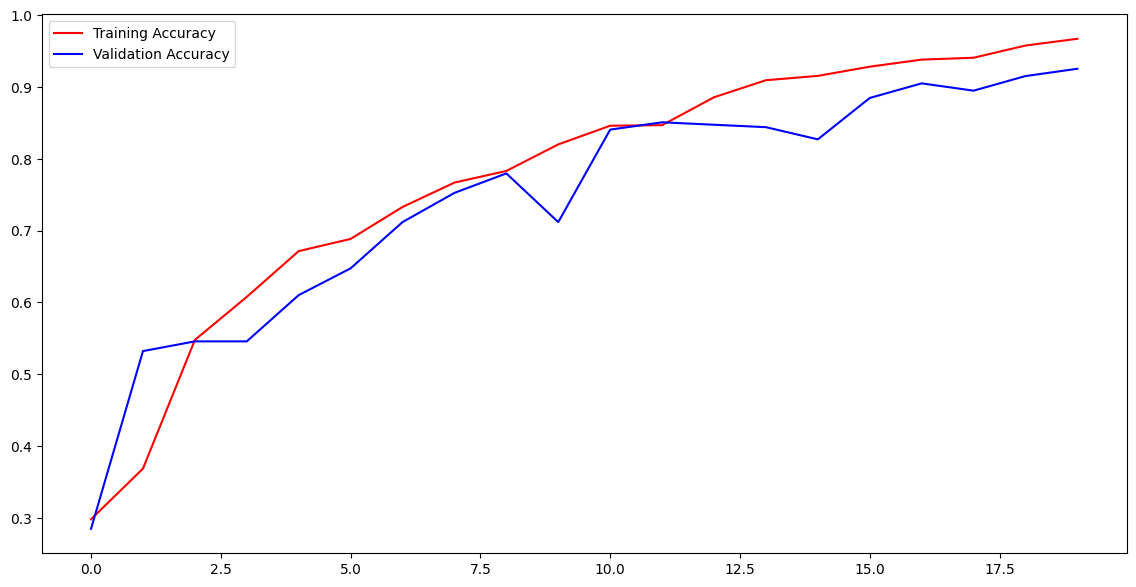

In [15]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

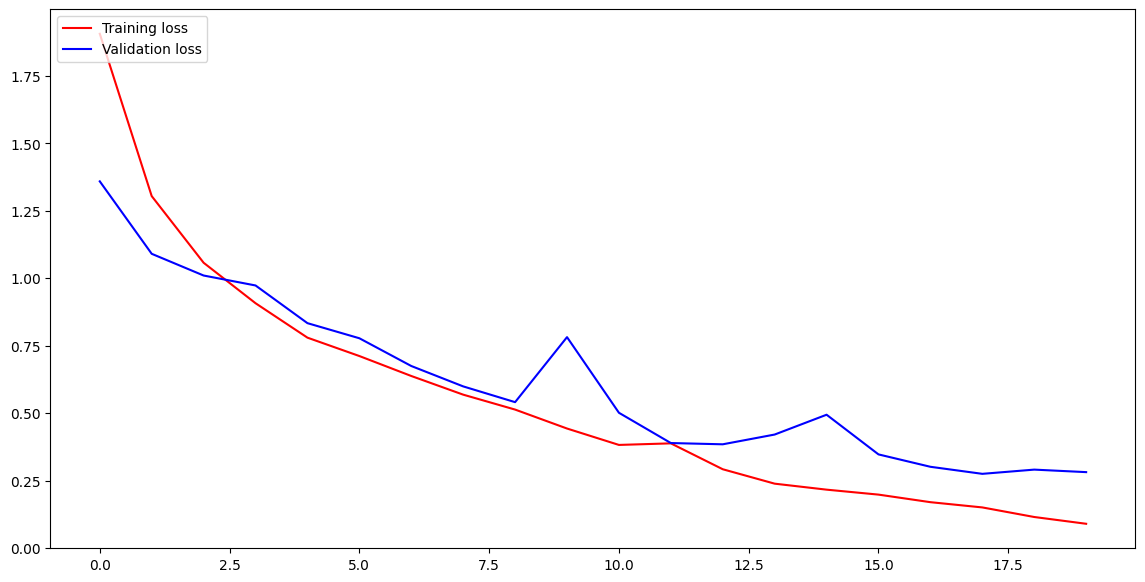

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [17]:
img = cv2.imread('/content/drive/MyDrive/braint/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [18]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

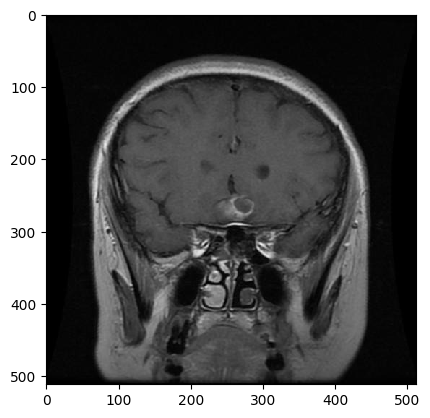

In [19]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/braint/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [20]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 722ms/step


3